# Deep Learning in Würzburg - Hands-On TensorFlow 2.0

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI-Guru/deep-learning-wuerzburg/blob/master/20200303%20FHWS%20Tensorflow%202/01%20MNIST.ipynb)



In [1]:
!pip install tensorflow==2.1.0

## TODO Write

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

## Loading data and split.

- Train: For training the Neural Network.
- Validate: To see how good the Neural Network is after each epoch.
- Test: To see how good the Neural Network is after training.

In [3]:
train_validation_split = tfds.Split.TRAIN.subsplit([8, 2])

(mnist_train, mnist_validate, mnist_test), info = tfds.load(
    name="mnist", 
    split=["train[:80%]", "train[80%:]", "test"],
    with_info=True,
    as_supervised=True
)

print(len(list(mnist_train)))
print(len(list(mnist_validate)))
print(len(list(mnist_test)))

48000
12000
10000


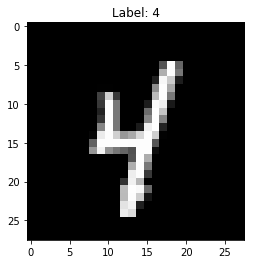

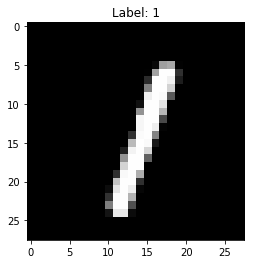

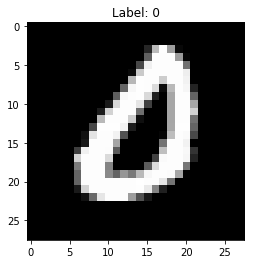

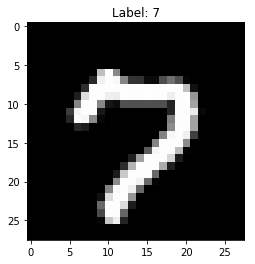

In [4]:
for mnist_example in mnist_train.take(4):
    image, label = mnist_example

    plt.imshow(image.numpy()[:, :, 0], cmap=plt.get_cmap("gray"))
    plt.title("Label: {}".format(label.numpy()))
    plt.show()
    plt.close()

## Preparing the datasets with tf.data.

Link: [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)

In [5]:
def encode(image, label):
    image_encoded = tf.image.convert_image_dtype(image, dtype=tf.float32)
    label_encoded = tf.one_hot(label, depth=10)
    return image_encoded, label_encoded

mnist_train = mnist_train.map(lambda image, label: encode(image, label))
mnist_validate = mnist_validate.map(lambda image, label: encode(image, label))
mnist_test = mnist_test.map(lambda image, label: encode(image, label))

## TODO Write.

In [6]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## TODO Write.

In [7]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## TODO Write.

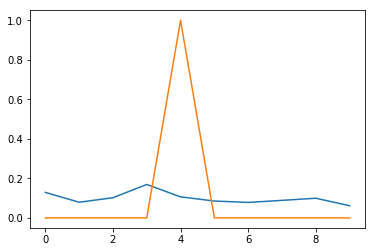

In [8]:
mnist_example = list(mnist_train.take(1).as_numpy_iterator())[0]

image, label = mnist_example
prediction = model.predict(np.array([image]))
plt.plot(prediction[0])
plt.plot(label)

## TODO Write.

In [9]:
history = model.fit(
    mnist_train.batch(128),
    epochs=5,
    validation_data=mnist_validate.batch(128)
)

Epoch 1/5
375/375 [==============================] - 5s 14ms/step - loss: 0.2823 - accuracy: 0.9179 - val_loss: 0.1564 - val_accuracy: 0.9561
Epoch 2/5
375/375 [==============================] - 5s 13ms/step - loss: 0.1170 - accuracy: 0.9660 - val_loss: 0.1148 - val_accuracy: 0.9672
Epoch 3/5
375/375 [==============================] - 6s 17ms/step - loss: 0.0769 - accuracy: 0.9779 - val_loss: 0.1004 - val_accuracy: 0.9713
Epoch 4/5
375/375 [==============================] - 6s 15ms/step - loss: 0.0547 - accuracy: 0.9850 - val_loss: 0.0949 - val_accuracy: 0.9736
Epoch 5/5
375/375 [==============================] - 5s 13ms/step - loss: 0.0404 - accuracy: 0.9893 - val_loss: 0.0929 - val_accuracy: 0.9747


## TODO Write.

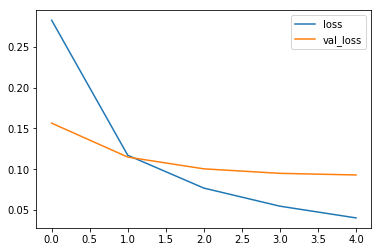

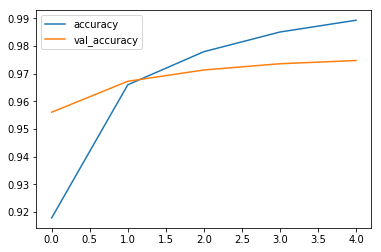

In [10]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

## TODO Write.

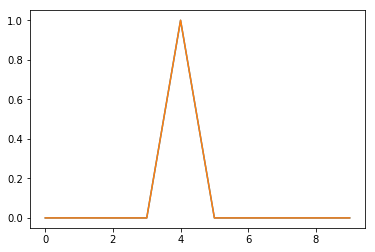

In [11]:
mnist_example = list(mnist_train.take(1).as_numpy_iterator())[0]

image, label = mnist_example
prediction = model.predict(np.array([image]))
plt.plot(prediction[0])
plt.plot(label)

## TODO Write.

In [12]:
loss, acc = model.evaluate(mnist_test.batch(32))
loss, acc

    313/Unknown - 1s 4ms/step - loss: 0.0831 - accuracy: 0.9754

(0.08310637555918998, 0.9754)

## TODO Write.

In [13]:
model.save("model.h5")